# Problem 1e

In src/p01e gda.py, fill in the code to calculate φ, μ0,
μ1, and Σ, use these parameters to derive θ, and use the resulting GDA model to make
predictions on the validation set.

In [13]:
import numpy as np
import src.util as util
import matplotlib.pyplot as plt

from src.linear_model import LinearModel

In [6]:



class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """

        m, n = x.shape

        phi = np.sum(y) / m
        mu_0 = np.dot(x.T, 1 - y) / np.sum(1 - y)
        mu_1 = np.dot(x.T, y) / np.sum(y)

        # Reshape y to compute pairwise product with mu
        # (m,) => (m, 1)
        y_reshaped = np.reshape(y, (m, -1))

        # Matrix comprises mu_0 and mu_1 based on the value of y. Shape(m, n)
        mu_x = y_reshaped * mu_1 + (1 - y_reshaped) * mu_0

        x_centered = x - mu_x

        sigma = np.dot(x_centered.T, x_centered) / m
        sigma_inv = np.linalg.inv(sigma)

        # Compute theta and theta_0 according to the conclusion from part (c)
        theta = np.dot(sigma_inv, mu_1 - mu_0)
        theta_0 = 1 / 2 * mu_0 @ sigma_inv @ mu_0 - 1 / 2 * mu_1 @ sigma_inv @ mu_1 - np.log((1 - phi) / phi)

        self.theta = np.insert(theta, 0, theta_0)

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """

        return util.add_intercept(x) @ self.theta >= 0


In [20]:
train_path = 'data/ds1_train.csv'

# Load dataset
x_train, y_train = util.load_dataset(train_path, add_intercept=False)

gda = GDA()
gda.fit(x_train, y_train)

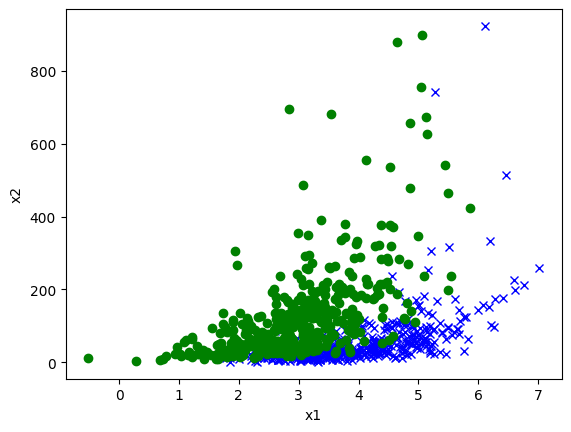

In [14]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2)

In [21]:
print(gda.theta)

None


TypeError: 'NoneType' object is not subscriptable

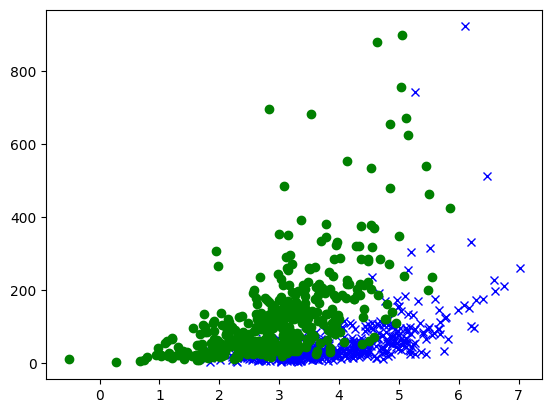

In [18]:
util.plot(x_train, y_train, theta=gda.theta)